In [ ]:
# https://www.kaggle.com/ruthgn/bank-marketing-data-set?select=bank-direct-marketing-campaigns.csv

In [ ]:
!pip install -U matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/csv/bank-direct-marketing-campaigns.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df = df.drop_duplicates(keep='last')
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,39404,39404,39404,39404,39404,39404,39404,39404,39404,39404,39404
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9873,23869,11561,31135,20561,32248,24673,13315,8197,33858,34806


In [ ]:
unique_col = df.describe(include='object').columns
unique_values = []

for col in unique_col:
  value = df[col].unique()
  unique_values.append(value)

unique_values

[array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 array(['nonexistent', 'failure', 'success'], dtype=object),
 array(['no', 'yes'], dtype=object)]

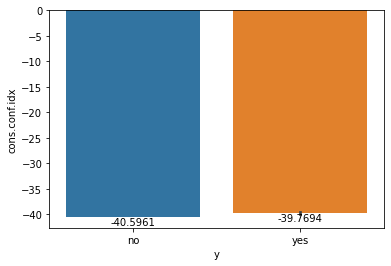

In [ ]:
# 가입여부를 기준으로 소비자 신뢰지수 평균 

ax = sns.barplot(x='y', y='cons.conf.idx', data=df);
for container in ax.containers:
    ax.bar_label(container);

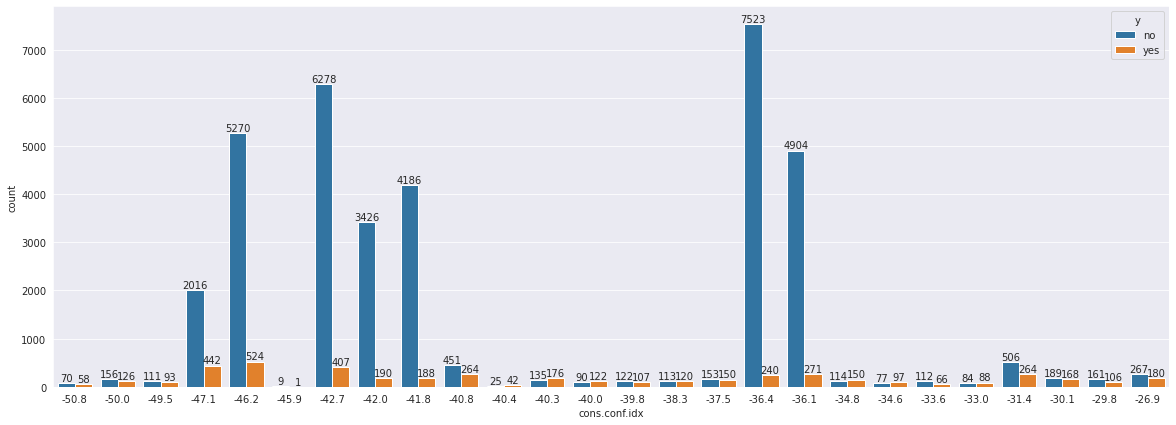

In [ ]:
# 가입여부를 기준으로 소비자 신뢰지수 시각화 

# Real = 소비자 신뢰지수가 낮을 수록 적게 소비하고 더 저축을 한다.
# 가설 2 
# 소비자 신뢰지수가 낮을 수록 가입률이 오를것이다. 
# -> 가입 수는 더 많지만 비율을 구하면 소비자 신뢰지수가 높을 수록 가입 확률이 2% 더 높다.

plt.figure(figsize=(20, 7))
ax = sns.countplot(x='cons.conf.idx',hue='y', data=df);
for container in ax.containers:
  ax.bar_label(container);
sns.set_style('darkgrid')

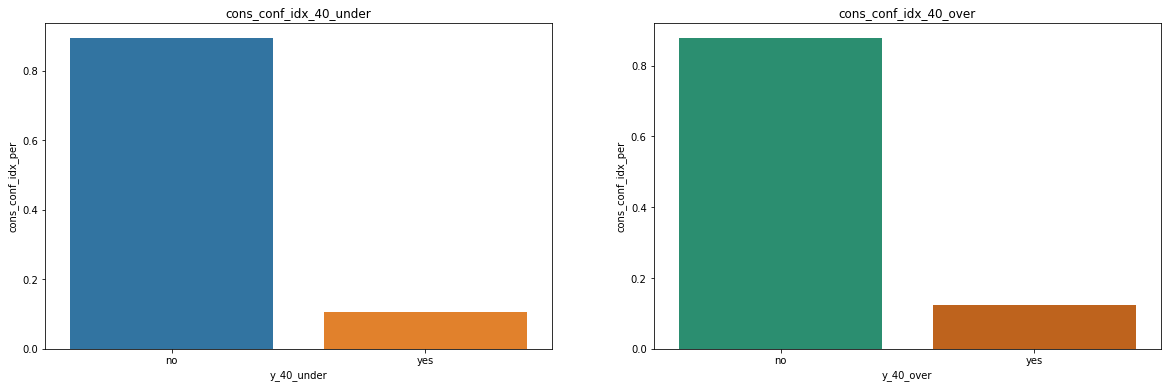

In [3]:
# -40보다 작을 때 가입 수(-40 ~ -50.8)
cons_40 = df[df['cons.conf.idx'] <= -40]['y'].value_counts(normalize=True).reset_index()
cons_40 = cons_40.rename(columns={'index': 'y_40_under', 'y':'cons_conf_idx_per'})

# -40 보다 클 때 가입 수 (-39.8 ~ - 26.9)
cons_40_under = df[df['cons.conf.idx'] > -40]['y'].value_counts(normalize=True).reset_index()
cons_40_under = cons_40_under.rename(columns={'index': 'y_40_over', 'y':'cons_conf_idx_per'})



fig, ax = plt.subplots(ncols=2)

fig.set_size_inches(20, 6)
sns.barplot(y='cons_conf_idx_per', x='y_40_under', data=cons_40, ax=ax[0]);
ax[0].set_title('cons_conf_idx_40_under');
sns.barplot(y='cons_conf_idx_per', x='y_40_over', data=cons_40_under, ax=ax[1], palette='Dark2');
ax[1].set_title('cons_conf_idx_40_over');
sns.set_style('darkgrid')

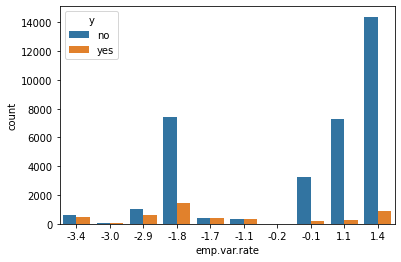

In [ ]:
# 고용지수 시각화 
sns.countplot(x='emp.var.rate', hue='y', data=df);

In [ ]:
# 클라이언트가 마지막으로 컨택된 후 경과 일  
# 999 = 만난적 없음, 압도적으로 많은 수 
# 만난 사람들과 안만난 사람들의 가입 비율을 확인
df['pdays'].value_counts(normalize=True)

999    0.961578
3      0.011116
6      0.010456
4      0.002995
9      0.001624
2      0.001548
7      0.001523
12     0.001472
10     0.001320
5      0.001167
13     0.000914
11     0.000711
1      0.000660
15     0.000609
14     0.000508
8      0.000457
0      0.000381
16     0.000279
17     0.000203
18     0.000178
19     0.000076
22     0.000076
21     0.000051
26     0.000025
20     0.000025
25     0.000025
27     0.000025
Name: pdays, dtype: float64

In [ ]:
def engineer(df):
  # 컬러명 변경 
  df=df.copy()
  df = df.rename(columns={'default' : 'wrong',
                     'emp.var.rate' : 'emp_var_rate',
                     'cons.price.idx' : 'cons_price_idx',
                     'cons.conf.idx' : 'cons_conf_idx',
                     'nr.employed' : 'np_employed'})
  
  df['job'] = df['job'].str.replace('.', '').str.replace('-', '_')
  df['education'] = df['education'].str.replace('.', '_')
  
  # yes or no Binary로 만들기

  df['y'] = df['y'].map(dict(yes=1, no=0))

  # for i in range(len(df['pdays'])):
  #   if df['pdays'].values[i] == 0:
  #     df['pdays'].values[i] = 1
  #   elif df['pdays'].values[i] == 999:
  #     df['pdays'].values[i] = 0
  #   else:
  #     df['pdays'].values[i] = 1
  

  # for i in range(len(df['campaign'])):
  #   if df['campaign'].values[i] >= 2:
  #     df['campaign'].values[i] = 2
  #   else:
  #     df['campaign'].values[i]
    
  # for i in range(len(df['previous'])):
  #   if df['previous'].values[i] >= 1:
  #     df['previous'].values[i] = 1
  #   else:
  #     df['previous'].values[i]
  
  df['age'] = df[df['age'] < np.percentile(df['age'], 99.5)]['age']
  df = df[df['age'].notna()]

  df['Total_campaign'] = ((df['campaign'] + df['previous']) / 2) 

  df.drop(columns=['np_employed','cons_conf_idx', 'poutcome','pdays','campaign','previous'], inplace=True)
  
  ## 해당 클라이언트에게  가입권유 전화를 해서 
  ##클라이언트가 전화를 받았다  1, 전화를 하지 않았다 0, 했지만 실패했다 -1
  # df['poutcome'] = df['poutcome'].replace('nonexistent', 0)
  # df['poutcome'] = df['poutcome'].replace('failure', -1)
  # df['poutcome'] = df['poutcome'].replace('success', 1)

  # df['marital'] = df['marital'].replace('unknown', 'single')


  return df

data = engineer(df)

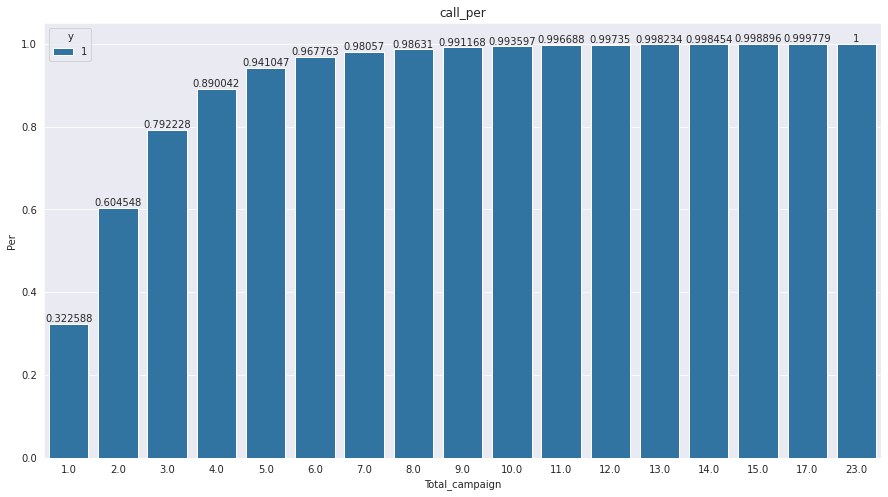

In [ ]:
# 이전과 지금까지 평균적으로 몇번 연락해야 가입률이 오르는지 

total = data.groupby(['Total_campaign'])['y'].value_counts()
total_df = pd.DataFrame(total)
total_df = total_df.rename(columns={'y' : 'sub'})
total_df.reset_index(inplace=True)
y_1_per = total_df[total_df['y'] == 1]
y_1_per['Per'] = np.cumsum(((y_1_per['sub']) / y_1_per['sub'].sum()))

plt.figure(figsize =(15, 8))
ax = sns.barplot(x='Total_campaign', y='Per',hue='y', data=y_1_per);

sns.set_style('darkgrid');
plt.title('call_per');
for container in ax.containers:
    ax.bar_label(container);

In [ ]:
# 연락을 많이 할 수록 가입률은 오른다
data.groupby(['pdays','previous'])['y'].sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
pdays,0,0,0,0,0,0,0,1,1,1,1,1,1,1
previous,0,1,2,3,4,5,6,1,2,3,4,5,6,7
y,3101,449,69,9,3,0,0,516,281,119,35,13,3,0


In [ ]:
data.groupby(['pdays','campaign'])['y'].sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
pdays,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,39,40,41,42,43,56,1,2,3,4,5,6,7,8,11,13
y,1739,922,466,221,110,64,36,17,17,12,12,3,4,1,2,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,531,279,106,28,10,11,2,0,0,0


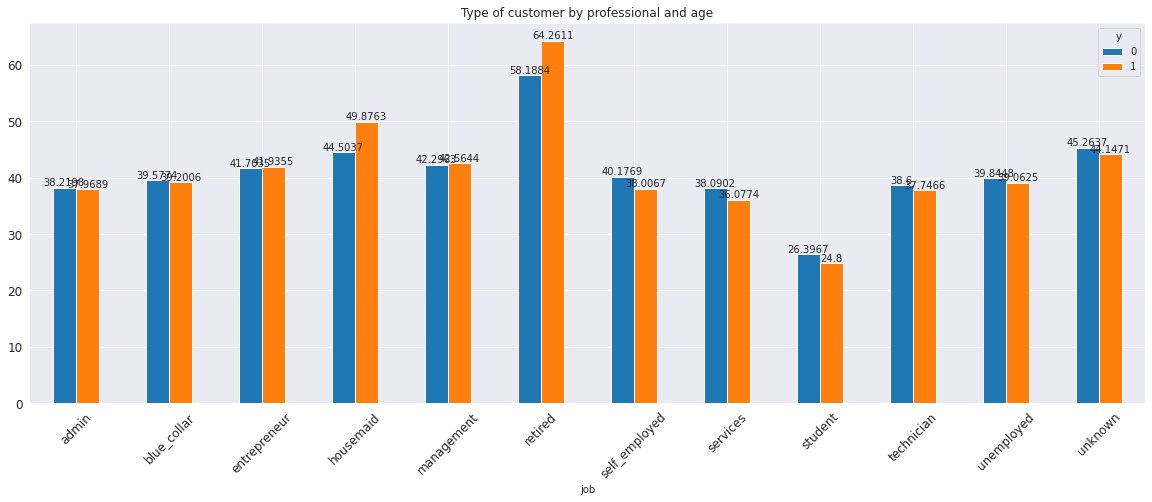

In [ ]:
# 직업에 따라 가입한 사람, 가입하지 않은 사람들의 평균 나이

type_pivot = data.pivot_table(
    columns="y",
    index="job",
    values="age", aggfunc=np.mean)
ax = type_pivot.sort_values(by=["job"], ascending=True).plot(kind="bar", title=("Type of customer by professional and age"), figsize=(20,7), fontsize = 12);
for container in ax.containers:
    ax.bar_label(container);
plt.xticks(rotation=45);
sns.set_style('darkgrid')

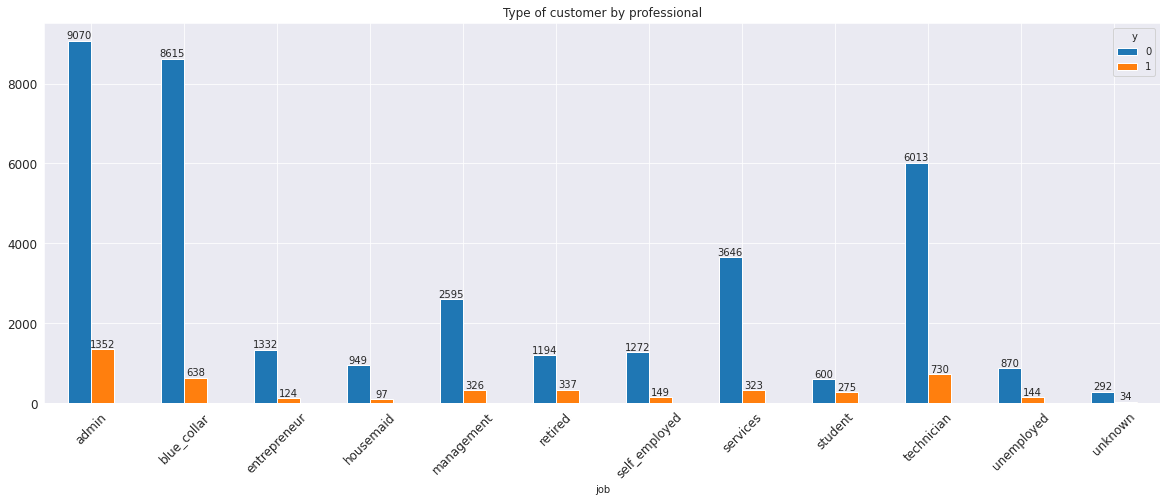

In [ ]:
# 직업별 가입 수 

type_pivot = data.pivot_table(
    columns="y",
    index="job",
    values="age", aggfunc='count')
ax = type_pivot.sort_values(by=["job"], ascending=True).plot(kind="bar", title=("Type of customer by professional"), figsize=(20,7), fontsize = 12);
for container in ax.containers:
    ax.bar_label(container);
plt.xticks(rotation=45);
sns.set_style('darkgrid')

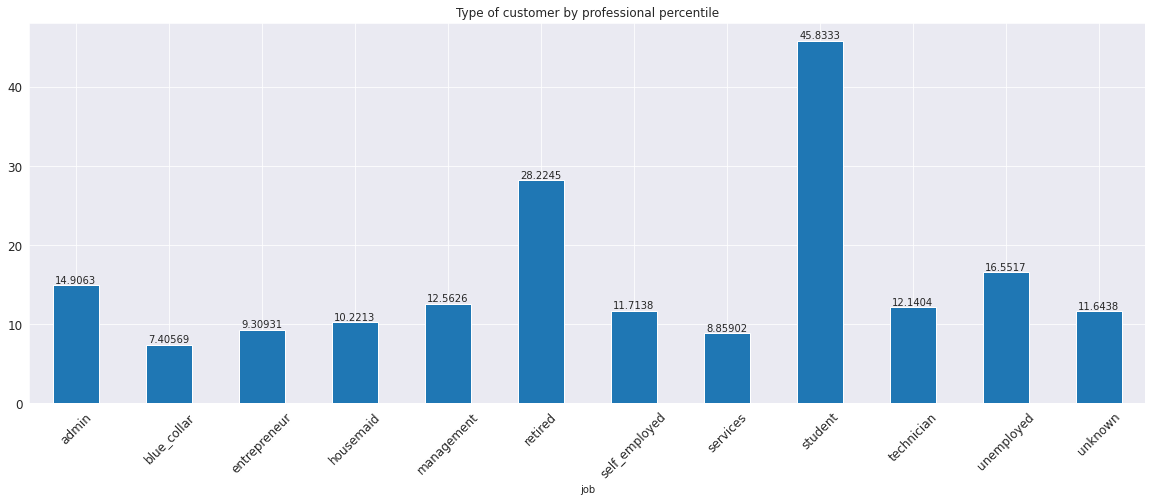

In [ ]:
# 직업별 가입 확률

type_pivot['per'] = (type_pivot[1] / type_pivot[0]) * 100
ax = type_pivot['per'].plot(kind="bar", title=("Type of customer by professional percentile"), figsize=(20,7), fontsize = 12);
for container in ax.containers:
    ax.bar_label(container);
plt.xticks(rotation=45);
sns.set_style('darkgrid')

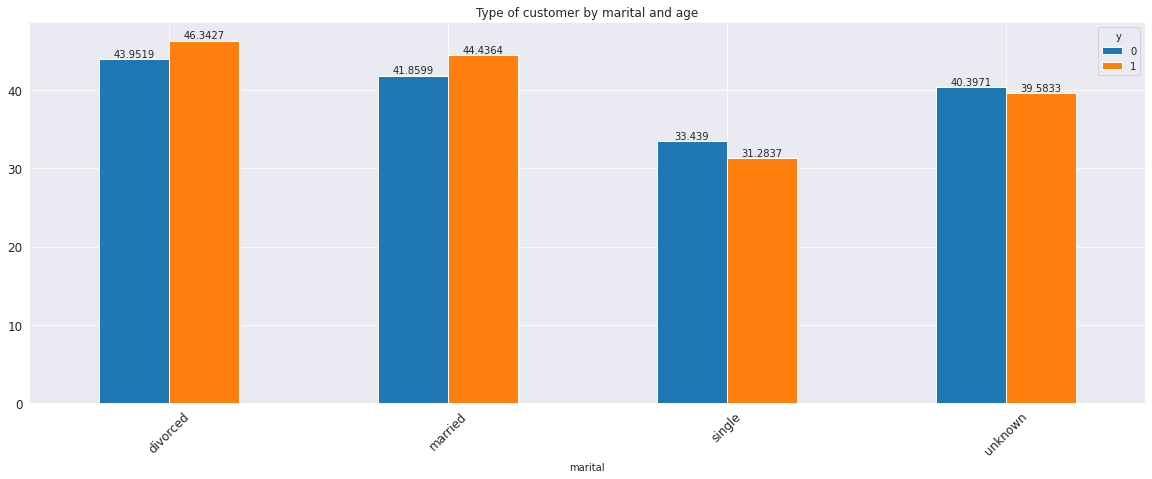

In [ ]:
# 고객의 결혼 여부에 따른 정기예금 가입 평균나이 
type_pivot_1 = data.pivot_table(
    columns="y",
    index="marital",
    values="age", aggfunc=np.mean)
ax = type_pivot_1.sort_values(by=["marital"], ascending=True).plot(kind="bar", title=("Type of customer by marital and age"), figsize=(20,7), fontsize = 12);
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45);
sns.set_style('darkgrid')

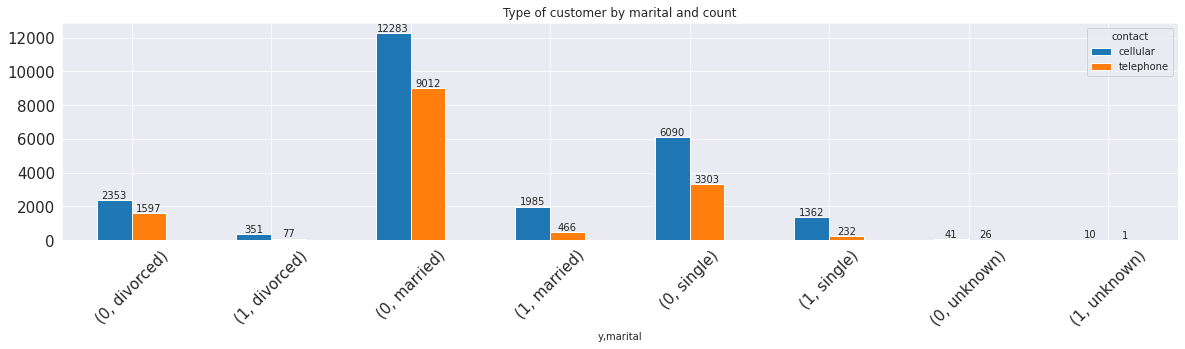

In [ ]:
# 채무 불이행이 있는 사람은 가입률이 없다라고 보여진다

# telephone 보다 cellular의 가입률이 더 높다 

type_pivot_2 = data.pivot_table(values = 'age',
     index=['y', 'marital'], columns = ['contact'], aggfunc = 'count', fill_value = 0)
ax = type_pivot_2.sort_values(by=["marital"],
                              ascending=True).plot(kind="bar", title=("Type of customer by marital and count"), figsize=(20,4), fontsize = 15);
plt.xticks(rotation=45);
for container in ax.containers:
    ax.bar_label(container)

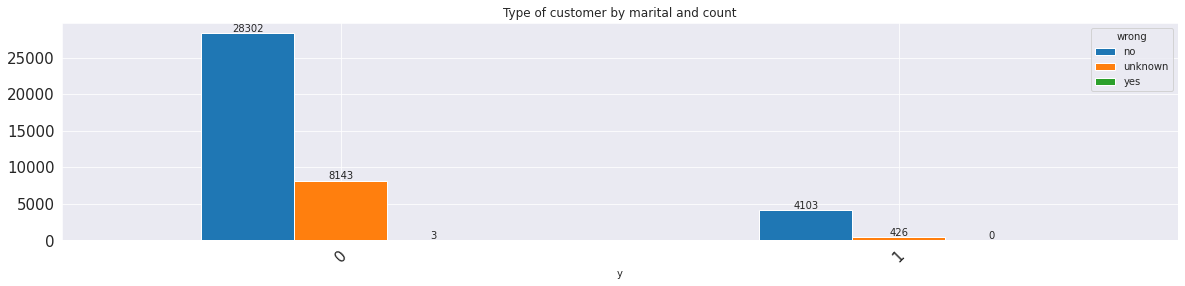

In [ ]:
# 채무불이행을 기준으로 가입유무 별 시각화

type_pivot_2_1= data.pivot_table(values = 'age',
     index=['y'], columns = ['wrong'], aggfunc = 'count', fill_value = 0)
ax = type_pivot_2_1.plot(kind="bar", title=("Type of customer by marital and count"), figsize=(20,4), fontsize = 15);
plt.xticks(rotation=45);
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('darkgrid')

In [ ]:
# 가설 _ 대출(대출, 주택담보대출)이 있으면 예금가입을 하지않을 것이다 .
# 큰 차이는 없지만 (주택담보대출)을 가진 사람들이 예금가입에 근소하게 높다
type_pivot_3 = data.pivot_table(values = 'age',
                                index=['y', 'wrong'], columns=['loan','housing'], aggfunc='count', fill_value = 0)

ax = type_pivot_3.sort_values(by=["wrong"],
                              ascending=True).plot(kind="bar", title=("Type of customer by wrong and count"), figsize=(20,4), fontsize = 15,edgecolor='k')
plt.xticks(rotation=45);
for container in ax.containers:
    ax.bar_label(container)

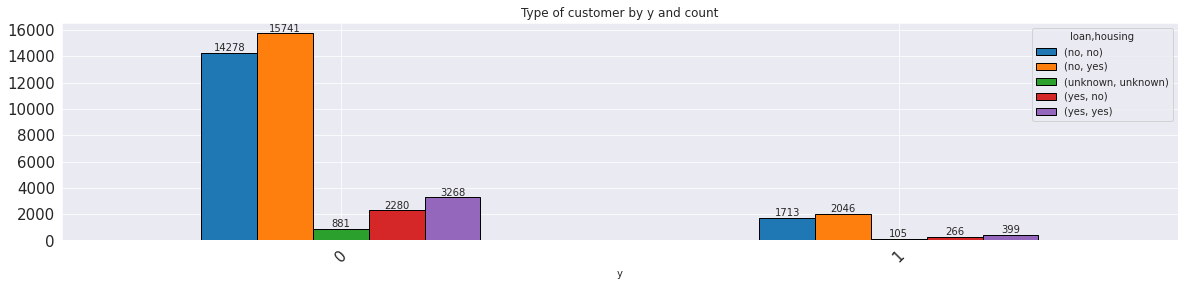

In [ ]:
# 2가지 대출을 기준으로 가입유무 별 시각화 

type_pivot_3_1 = data.pivot_table(values = 'age',
                                index=['y'], columns=['loan','housing'], aggfunc='count', fill_value = 0)

ax = type_pivot_3_1.plot(kind="bar", title=("Type of customer by y and count"), figsize=(20,4), fontsize = 15,edgecolor='k')
plt.xticks(rotation=45);
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('darkgrid')

In [ ]:
false_3 = type_pivot_3.loc[0]
true_3 = type_pivot_3.loc[1]
per_3 = (true_3 / (true_3 + false_3)) * 100
per_3

loan            no               unknown       yes           
housing         no        yes    unknown        no        yes
wrong                                                        
no       12.943233  14.001041  12.732095  12.56913  12.700580
unknown   5.520362   5.422556   4.867257   4.41989   5.034965
yes            NaN        NaN        NaN       NaN        NaN

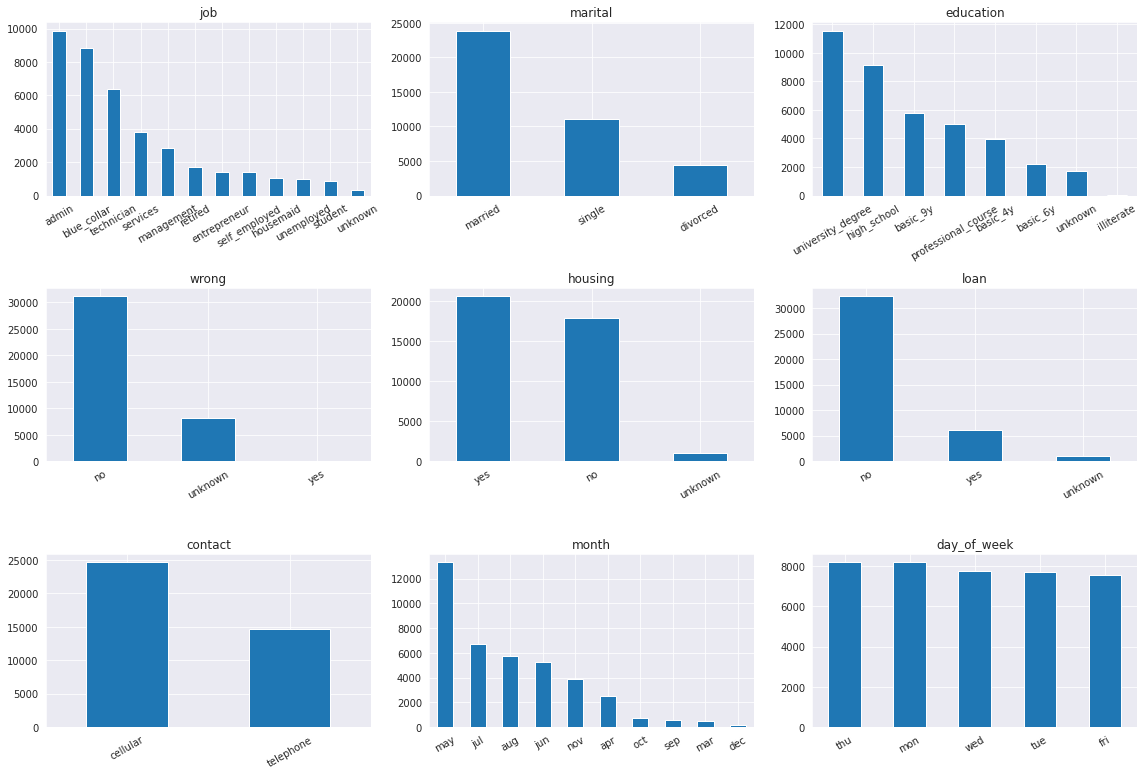

In [ ]:
cat_features = list(data.select_dtypes('object').columns)
n = len(cat_features)
i = 1
plt.figure(figsize=(16, 14))
for feature in data[cat_features]:
  plt.subplot(round(n/2), round(n/3), i)
  data[feature].value_counts().plot.bar()
  plt.xticks(rotation=90)
  plt.title(feature)
  i+=1
  plt.tight_layout();
  plt.xticks(rotation=30);

In [ ]:
!pip install -U matplotlib

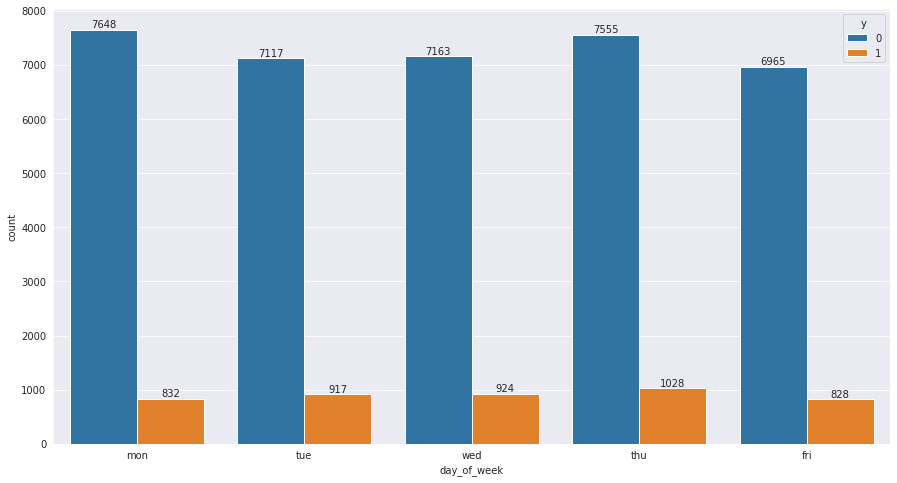

In [ ]:
# 요일별 가입 수 파악은 가망이 없는것 같다.

plt.figure(figsize =(15, 8))
ax = sns.countplot(x='day_of_week', hue='y', data=data);
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('darkgrid')

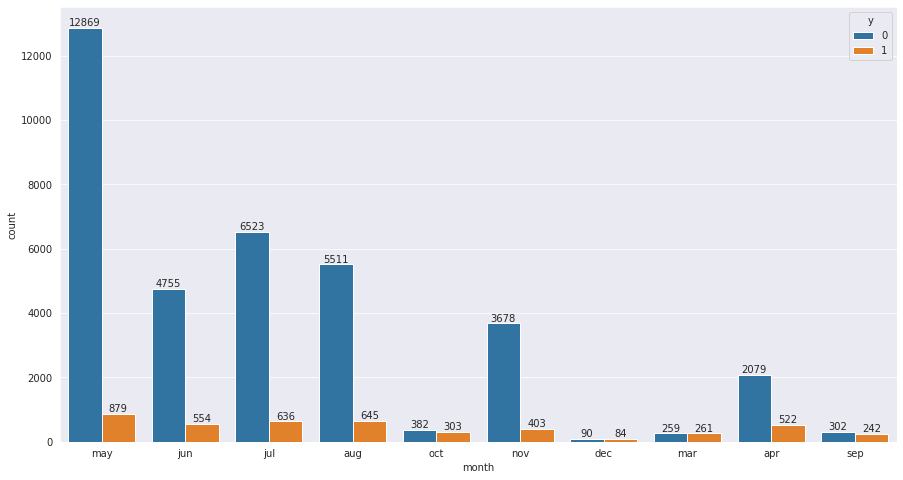

In [ ]:
plt.figure(figsize=(15, 8))
# 월별 가입 수 파악
# 시도에 비해  9, 10,12월은 잘나온것같다.
# 5월에는 시도에 비해 결과는 처참하다.
ax = sns.countplot(x='month', hue='y', data=data);
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('darkgrid')

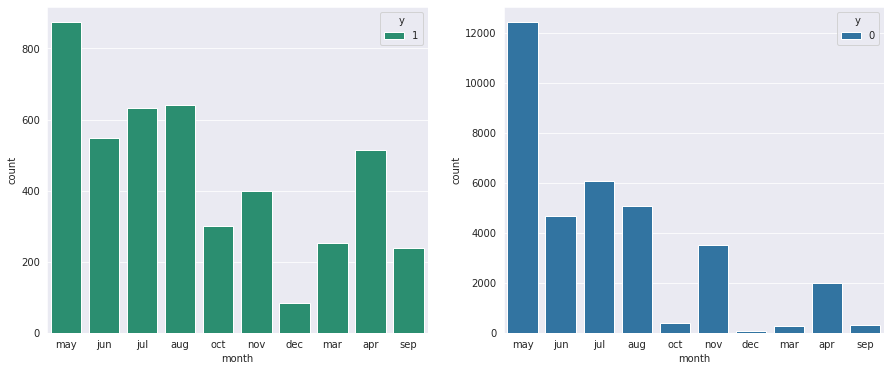

In [ ]:
# 가입한 사람들의 Month
y_1 = data[data.y == 1]
y_0 = data[data.y == 0]
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(15, 6)

sns.countplot(x = 'month', hue='y', data=y_1, ax=ax[0], palette='Dark2');
sns.countplot(x = 'month', hue='y', data=y_0, ax=ax[1]);
sns.set_style('darkgrid')

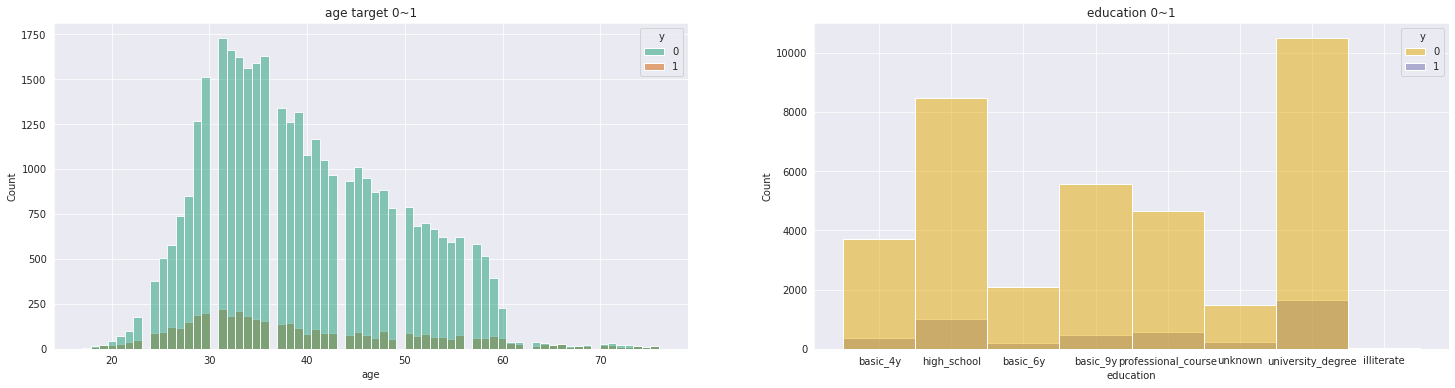

In [ ]:
# 30~40에 많은 가입이 있다. 가입하지 않은 사람 또한 많다.
# 고등학교 졸업한 사람들과, 대학학위를 가진사람 가입률이 높다
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(25, 6)
sns.histplot(x = 'age', hue='y', data=data, palette='Dark2',ax =ax[0]);
ax[0].set_title('age target 0~1');
sns.histplot(x='education', hue='y', data=data, palette='Dark2_r', ax=ax[1]);
ax[1].set_title('education 0~1');
sns.set_style('darkgrid')

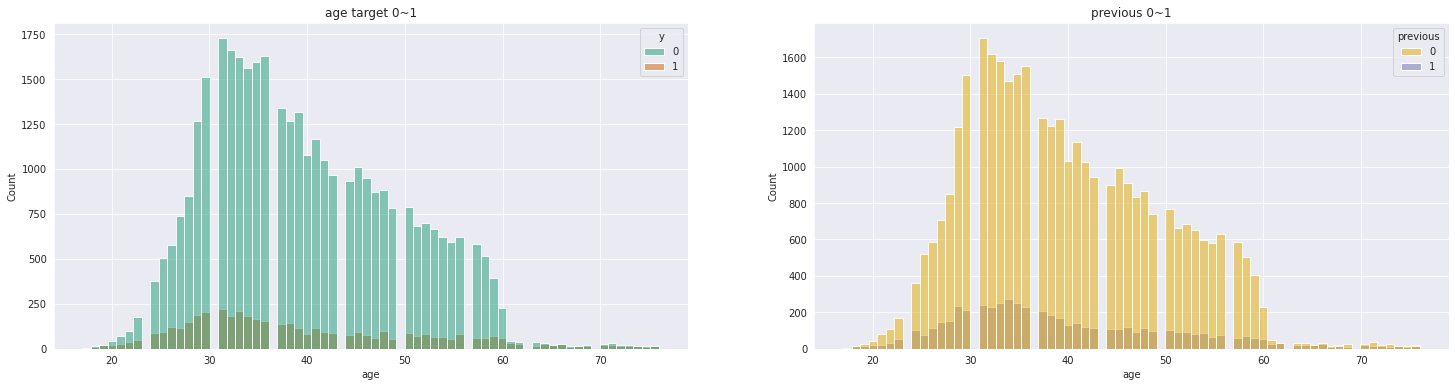

In [ ]:
# 나이별 가입 한 사람
# 나이별 컨택에 노출된 사람의 가입률 
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(25, 6)
sns.histplot(x = 'age', hue='y', data=data, palette='Dark2',ax =ax[0]);
ax[0].set_title('age target 0~1');
sns.histplot(x='age', hue='previous', data=data, palette='Dark2_r', ax=ax[1]);
ax[1].set_title('previous 0~1');

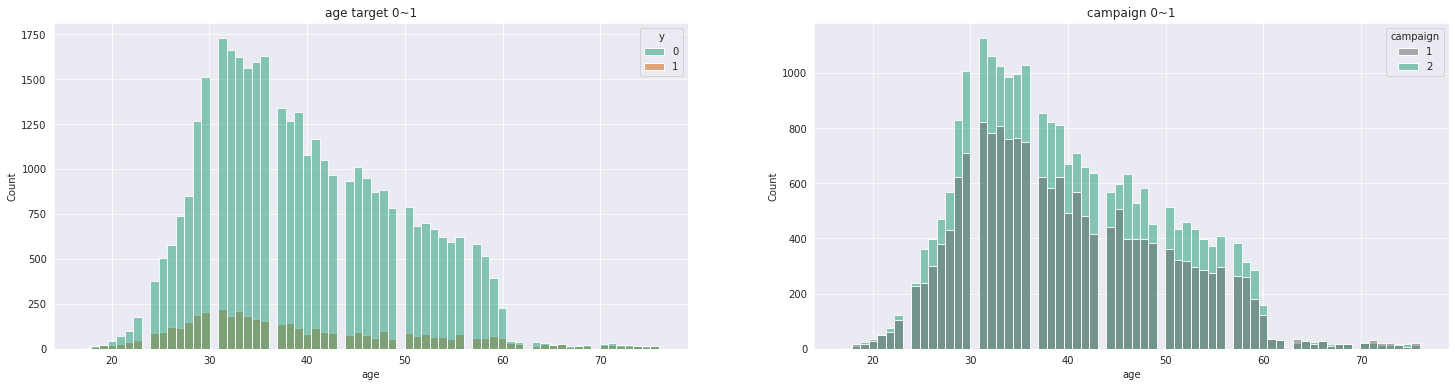

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(25, 6)
sns.histplot(x = 'age', hue='y', data=data, palette='Dark2',ax =ax[0]);
ax[0].set_title('age target 0~1');
sns.histplot(x='age', hue='campaign', data=data, palette='Dark2_r', ax=ax[1]);
ax[1].set_title('campaign 0~1');

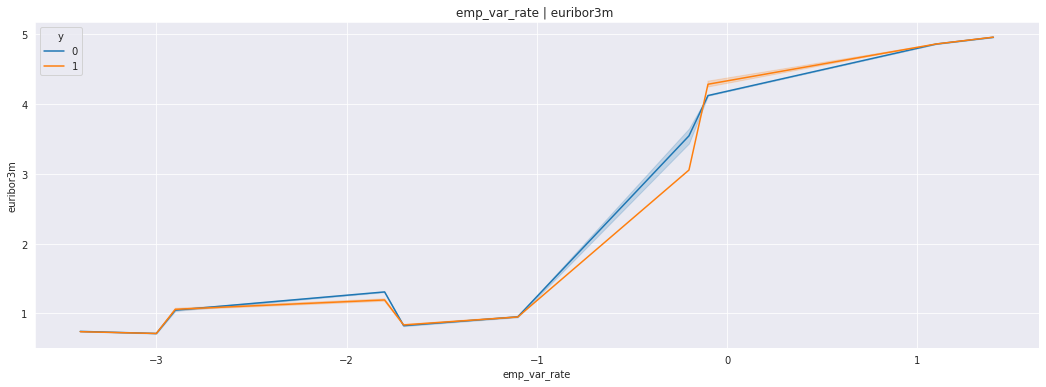

In [ ]:
#@title
# 고용 변동률에 따른 금리변화 확인
# 고용변동률과 금리변화에 따른 가입률은 비슷한 수치를 띈다. 
plt.figure(figsize=(18, 6))
sns.lineplot(x = 'emp_var_rate', y = 'euribor3m', hue='y', data=data);
plt.title('emp_var_rate | euribor3m ');

In [ ]:
#금리변화에 가입한 사람들의 특징을 알기위함.
# 금리에 따라 가입시기가 변하지 않는다라고 볼 수있다.
data.groupby(['euribor3m'])['y'].sum().reset_index().sort_values(by='y',ascending=False).head(20)

,euribor3m,y
306,4.962,142
221,1.405,134
216,1.365,133
307,4.963,126
204,1.266,103
201,1.260,100
305,4.961,90
122,0.879,84
47,0.715,84
46,0.714,73


In [ ]:
# 결혼여부, 채무불이행, 대출 여부에 따른 예금가입한 사람들의 특징을 찾기위함. 

a = data.groupby(['marital', 'wrong','loan'])['y'].sum().reset_index().sort_values(by='y', ascending=False)

b = data.groupby(['marital', 'wrong','loan'])['y'].count().reset_index().sort_values(by='y', ascending=False)

a['y_total_count'] = b['y']

a['y_per'] = (a.y / a.y_total_count) * 100
b_sum = b['y'].sum()

# 결혼의 유무는 관계없이  채무 불이행과 대출이 없으면 가입률이 높다. -> 주 타겟층 
per_deposit = []
for i in range(len(a)):
 
  x = (a['y'].iloc[i] / b_sum) * 100
  per_deposit.append(x)
a['y_per_deposit'] = per_deposit
a

In [ ]:
!pip install -U category_encoders

In [ ]:
!pip install -U shap

In [ ]:
!pip install -U eli5

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import shap
import eli5
from xgboost import XGBClassifier,plot_importance

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
df = data.copy()

In [ ]:
target = 'y'
features = df.columns.drop('y')


train, test = train_test_split(df, test_size=.2, random_state=42, shuffle=True)
train.shape, test.shape

((31207, 15), (7802, 15))

In [ ]:
train, val = train_test_split(train, test_size=.3, random_state=42)
train.shape, val.shape

((21844, 15), (9363, 15))

In [ ]:
X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, X_test.shape

((21844, 14), (9363, 14), (7802, 14))

In [ ]:
# Base line RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

pipe_random = Pipeline([
                        ('scaler',make_pipeline(OrdinalEncoder(),SimpleImputer())),
                                     ('random', RandomForestClassifier(random_state=42))
])

X_train_scaler = pipe_random.named_steps['scaler'].fit_transform(X_train)
X_val_scaler = pipe_random.named_steps['scaler'].transform(X_train)

pipe_random.named_steps['random'].fit(X_train_scaler, y_train)

pipe_random.named_steps['random'].score(X_val, y_val)

y_val_pred = pipe_random.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val, y_val_pred))
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.scatter(fpr, tpr);
plt.plot(fpr, tpr, color='red');

In [ ]:
# XGBClassifier Basic model
pipe = Pipeline([
    ('pipeline',make_pipeline(OrdinalEncoder(),SimpleImputer())),
    ('xgb', XGBClassifier(random_state=42))])

X_train_pipe = pipe.named_steps['pipeline'].fit_transform(X_train)
X_val_pipe = pipe.named_steps['pipeline'].transform(X_val)

eval_set_base = [(X_train_pipe, y_train),
                 (X_val_pipe, y_val)]

xgb = pipe.named_steps['xgb']
xgb.fit(X_train_pipe, y_train, eval_set=eval_set_base, eval_metric='auc', early_stopping_rounds=30)

baseline_score :  0.8942646587632169
0.7855254068204491


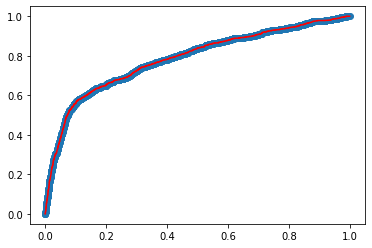

In [ ]:
print('baseline_score : ',xgb.score(X_val_pipe, y_val))

y_val_pred = xgb.predict_proba(X_val_pipe)[:,1]
print(roc_auc_score(y_val, y_val_pred))
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.scatter(fpr, tpr);
plt.plot(fpr, tpr, color='red');

In [ ]:
X_test_pipe= pipe.named_steps['pipeline'].transform(X_test)
class_index = 1
y_pred_proba_pipe = pipe.named_steps['xgb'].predict_proba(X_test_pipe)[:, class_index]
print(pipe.named_steps['xgb'].classes_[class_index])
print(roc_auc_score(y_test, y_pred_proba_pipe))

y_test_pred_pipe = pipe.named_steps['xgb'].predict(X_test_pipe)
print(classification_report(y_test, y_test_pred_pipe))

1
0.7945054335908491
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6915
           1       0.62      0.24      0.35       887

    accuracy                           0.90      7802
   macro avg       0.77      0.61      0.65      7802
weighted avg       0.88      0.90      0.88      7802



In [ ]:
# Randomized search CV hyper parameter 

pipe2 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier()
)
params = {
    'xgbclassifier__learning_rate' : uniform(0, 1),
    'xgbclassifier__n_estimators' : randint(100, 1000),
    'xgbclassifier__max_depth' : randint(1, 10),
    'xgbclassifier__gamma' : randint(1, 10),
    'xgbclassifier__min_child_weight' : randint(1, 10)
}

clf = RandomizedSearchCV(
    estimator = pipe2,
    param_distributions = params,
    n_iter=10,
    scoring = 'roc_auc',
    n_jobs= -1,
    cv=5,
    verbose=1,
    random_state=42
)
clf.fit(X_train, y_train)

In [ ]:
clf.best_estimator_

In [ ]:
pipe_33 = Pipeline([
    ('pipeline',make_pipeline(OrdinalEncoder(),SimpleImputer())),
    ('xgb', XGBClassifier(random_state=42, n_jobs=-1,scale_pos_weight=1))])

scale = pipe_33 .named_steps['pipeline']
xgb2 = pipe_33 .named_steps['xgb']
X_train_pipe = scale.fit_transform(X_train)
X_val_pipe = scale.transform(X_val)

eval_set_base = [(X_train_pipe, y_train),
                 (X_val_pipe, y_val)]

xgb2 = pipe_33 .named_steps['xgb']
xgb2.fit(X_train_pipe, y_train, eval_set=eval_set_base,
                                eval_metric='auc', early_stopping_rounds=50)

hyper_score :  0.8936238385132971
0.7804233685570009


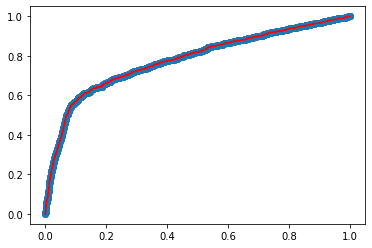

In [ ]:
print('hyper_score : ',xgb2.score(X_val_pipe, y_val))

y_val_pred = xgb2.predict_proba(X_val_pipe)[:,1]
print(roc_auc_score(y_val, y_val_pred))
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.scatter(fpr, tpr);
plt.plot(fpr, tpr,color='red');

In [ ]:
X_test_pipe= scale.transform(X_test)
class_index = 1
y_pred_proba_pipe = xgb2.predict_proba(X_test_pipe)[:, class_index]
print(xgb2.classes_[class_index])
print(roc_auc_score(y_test, y_pred_proba_pipe))

y_test_pred_pipe = xgb2.predict(X_test_pipe)
print(classification_report(y_test, y_test_pred_pipe))

1
0.7929618816195028
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6906
           1       0.62      0.25      0.36       896

    accuracy                           0.90      7802
   macro avg       0.76      0.61      0.65      7802
weighted avg       0.88      0.90      0.88      7802



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Under
rus = RandomUnderSampler()
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
X_val_under, y_val_under = rus.fit_resample(X_val, y_val)

In [ ]:
# Under
X_train_under = pd.DataFrame(X_train_under, columns=X_train.columns)
y_train_under = pd.Series(y_train_under)

X_val_under = pd.DataFrame(X_val_under, columns=X_val.columns)
y_val_under = pd.Series(y_val_under)

In [ ]:
# Over
ros = RandomOverSampler()
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
X_val_over, y_val_over = ros.fit_resample(X_val, y_val)

In [ ]:
#Over
X_train_over = pd.DataFrame(X_train_over, columns=X_train.columns)
y_train_over = pd.Series(y_train_over)

X_val_over = pd.DataFrame(X_val_over, columns=X_val.columns)
y_val_over = pd.Series(y_val_over)

In [ ]:
# Under Sampling

processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer()
)
X_train_pro_under = processor.fit_transform(X_train_under)
X_val_pro_under = processor.transform(X_val_under)

eval_set = [(X_train_pro_under, y_train_under),
            (X_val_pro_under, y_val_under)]

model_under = XGBClassifier(random_state=42, n_estimators=443, n_jobs=-1, verbosity=1, learning_rate=0.9656320330745594, max_depth=2)
model_under.fit(X_train_pro_under, y_train_under, eval_set=eval_set, eval_metric='auc', early_stopping_rounds=30)

model_under_score :  0.7421800947867299
0.777735899912401


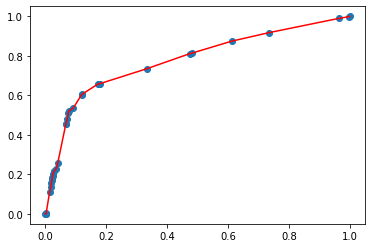

In [ ]:
print('model_under_score : ',model_under.score(X_val_pro_under, y_val_under))

y_val_pred = model_under.predict_proba(X_val_pro_under)[:,1]
print(roc_auc_score(y_val_under, y_val_pred))
fpr, tpr, thresholds = roc_curve(y_val_under, y_val_pred)
plt.scatter(fpr, tpr);
plt.plot(fpr, tpr, color='red');

In [ ]:
X_test_pro= processor.transform(X_test)
class_index = 1
y_pred_proba = model_under.predict_proba(X_test_pro)[:, class_index]
print(model_under.classes_[class_index])
print(roc_auc_score(y_test, y_pred_proba))

1
0.7226926120143974


In [ ]:
y_test_pred = model_under.predict(X_test_pro)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6906
           1       0.36      0.59      0.44       896

    accuracy                           0.83      7802
   macro avg       0.65      0.73      0.67      7802
weighted avg       0.87      0.83      0.85      7802



In [ ]:
# def __init__(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None
#              , objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1,
#              max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1,
#              colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
# Over Sampling

processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer()
)
X_train_pro_over = processor.fit_transform(X_train_over)
X_val_pro_over = processor.transform(X_val_over)

X_train_pro_over = pd.DataFrame(X_train_pro_over, columns=X_train.columns)
X_val_pro_over = pd.DataFrame(X_val_pro_over, columns = X_val.columns)

eval_set = [(X_train_pro_over, y_train_over),
            (X_val_pro_over, y_val_over)]

model_over = XGBClassifier(random_state=42, n_estimators=800, n_jobs=-1, verbosity=1, learning_rate=0.3745401188473625, max_depth=8)

model_over.fit(X_train_pro_over, y_train_over, eval_set=eval_set, eval_metric='auc', early_stopping_rounds=30)

0.7338709677419355
0.7755962285192919


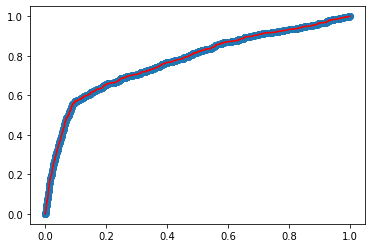

In [ ]:
print(model_over.score(X_val_pro_over, y_val_over))

y_val_pred = model_over.predict_proba(X_val_pro_over)[:,1]
print(roc_auc_score(y_val_over, y_val_pred))
fpr, tpr, thresholds = roc_curve(y_val_over, y_val_pred)
plt.scatter(fpr, tpr);
plt.plot(fpr, tpr, color='r');

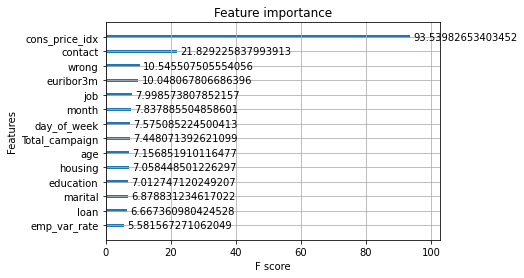

In [ ]:
fig, ax = plt.subplots()

plot_importance(model_over,ax=ax,importance_type='gain');

In [ ]:
X_test_pro_over = processor.transform(X_test)
X_test_pro_over = pd.DataFrame(X_test_pro_over, columns = X_test.columns)

class_index = 1
y_pred_proba_over = model_over.predict_proba(X_test_pro_over)[:, class_index]
print(model_over.classes_[class_index])
print(roc_auc_score(y_test, y_pred_proba_over))

y_test_pred_over = model_over.predict(X_test_pro_over)
print(classification_report(y_test, y_test_pred_over))

1
0.7840231288269
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      6906
           1       0.37      0.60      0.46       896

    accuracy                           0.84      7802
   macro avg       0.66      0.73      0.68      7802
weighted avg       0.88      0.84      0.85      7802



In [ ]:
from lightgbm import LGBMClassifier, plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
lgbm = LGBMClassifier()


X_train_l = processor.fit_transform(X_train)
X_val_l = processor.transform(X_val)


eval_set = [(X_train_l, y_train),
            (X_val_l, y_val)]


params = {
    'learning_rate' : uniform(0, 1),
    'n_estimators' : randint(100, 1000),
    'max_depth' : randint(1, 10)
}

clf = RandomizedSearchCV(
    estimator = lgbm,
    param_distributions = params,
    n_iter=10,
    scoring = 'roc_auc',
    n_jobs= -1,
    cv=5,
    verbose=1,
    random_state=42
)
clf.fit(X_train_l, y_train)

In [ ]:
ratio = 0.11 / 0.88

In [ ]:
best = clf.best_estimator_

best.fit(X_train_l, y_train, early_stopping_rounds=30, eval_metric=['auc'], eval_set=eval_set, verbose=True)

0.7664732445401796


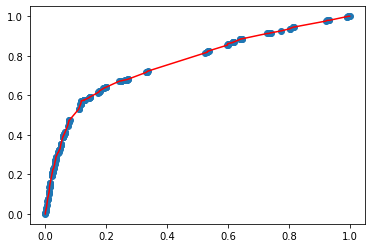

In [ ]:
#@title
best.score(X_val_l, y_val)

y_val_pred = best.predict_proba(X_val_l)[:,1]

print(roc_auc_score(y_val, y_val_pred))

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.scatter(fpr, tpr);
plt.plot(fpr, tpr,color='red');

In [ ]:
X_test_l = processor.transform(X_test)

class_index = 1
y_pred_proba= best.predict_proba(X_test_l)[:, class_index]
print(best.classes_[class_index])
print(roc_auc_score(y_test, y_pred_proba))

y_test_pred = best.predict(X_test_l)
print(classification_report(y_test, y_test_pred))

1
0.7780922418652517
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6906
           1       0.60      0.20      0.30       896

    accuracy                           0.89      7802
   macro avg       0.75      0.59      0.62      7802
weighted avg       0.87      0.89      0.87      7802



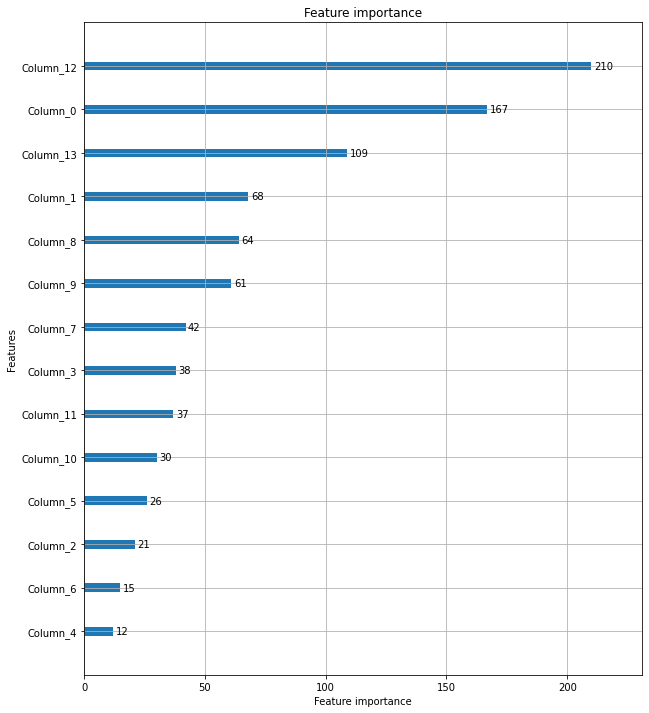

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_wrapper, ax=ax);

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb2)

In [ ]:
def explain(row_number):
    positive_class = 1
    positive_class_index = 1

    # row 값을 변환합니다

    row = X_test.iloc[[row_number]]
    row_processed = scale.transform(row)
    # row_processed = pd.DataFrame(row_processed, columns=X_test.columns)

    # 예측하고 예측확률을 얻습니다 
    pred = xgb2.predict(row_processed)[0]
    if pred == 1:
      pred = 'YES'
    else:
      pred = 'NO'
    pred_proba = xgb2.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    # if pred != positive_class:
    #     pred_proba = 100 - pred_proba

    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row_processed)

    # 0에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

     # 예측결과와 확률값을 얻습니다
    print(f'이 고객에 대한 예측결과는 {pred} 으로, YES 일 확률은 {pred_proba:.0f}% 입니다.')

    # 예측에 가장 반대적인 영향을 준 top3
    print('\n')
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장  영향을 준 요인 
    print('\n')
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')
    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )


In [ ]:
explain(333)

이 고객에 대한 예측결과는 NO 으로, YES 일 확률은 15% 입니다.


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. month : may
2. cons_price_idx : 92.893
3. housing : yes


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. euribor3m : 1.25
2. emp_var_rate : -1.8
3. contact : cellular


In [ ]:
print('정답률 : ' ,len(df[df['y'] == 1]) / len(df['y']))

0.11656301561111816